In [15]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st
import json

In [2]:
y   = load('../../March2021/Observation_models/ObsY.joblib')
CNN = load('../../March2021/Observation_models/CNNY.joblib') 
histEns = load ('FF_historical_ensembleMean_Best5.joblib')

In [3]:
def getSeasonalCycle( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=dArray.groupby('time.dayofyear').mean()
        
    
    return fg

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

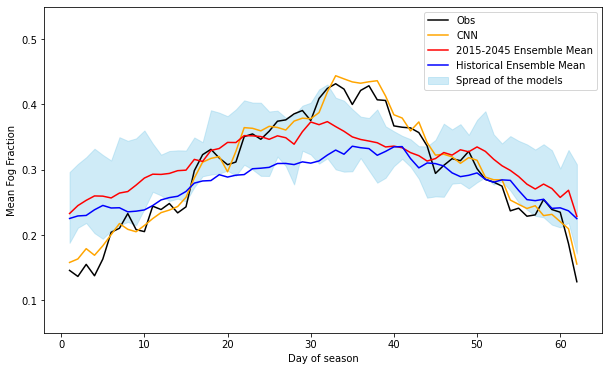

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

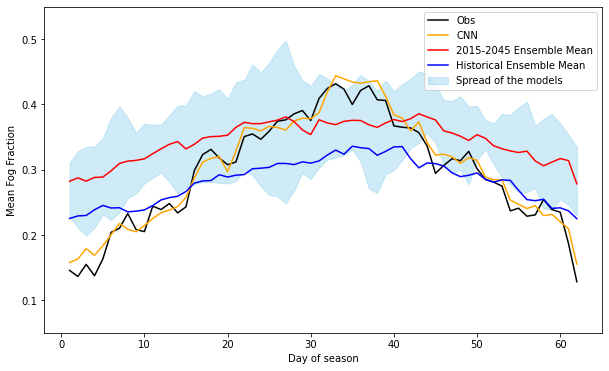

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

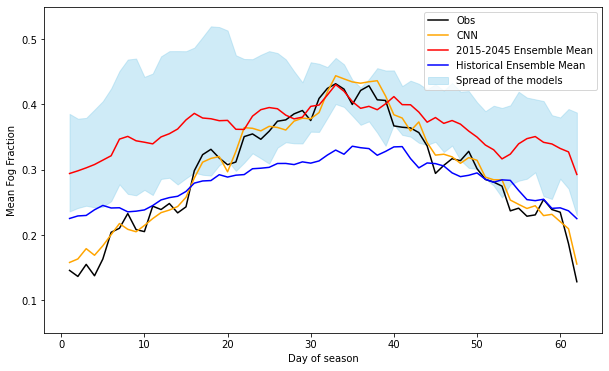

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

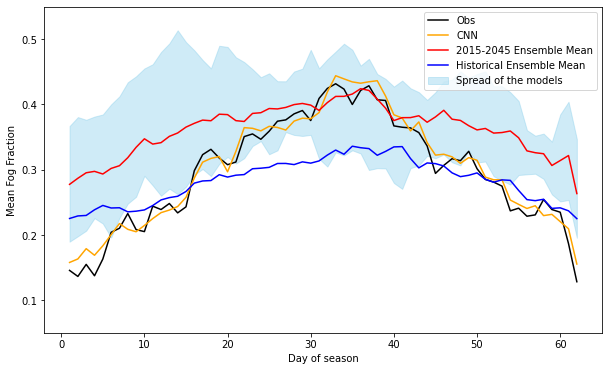

In [24]:
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs


scenarioString=['126','245','370','585']
classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']

x=np.arange(1,63)
for s in scenarioString:
    fig = plt.figure(figsize=(10,6))
    MTs=[]
    for  cL in classes:
        fL=load('../../April2021/New_ssp'+s+'/Modelplots_future/'+cL+'_ssp'+s+'.joblib')
        fL1=fL.sel(time=slice('2015-1-1','2045-12-31'))
        ts1=getSeasonalCycle(fL1)
        ts2=ts1.roll(dayofyear=31)
        ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
        MTs.append(ts)
        MS=np.array(MTs)
    meanMS=np.mean(MS, axis=0)
    minMS=np.amin(MS,axis=0)
    maxMS=np.amax(MS,axis=0)
    plt.fill_between(x, maxMS,minMS,
                 color="skyblue", alpha=0.4,label='Spread of the models')
    plt.plot(x,OTs,label='Obs', color='black')
    plt.plot(x,CNNTs,label='CNN', color='orange')
    plt.plot(x,meanMS,label='2015-2045 Ensemble Mean', color='red')
    plt.plot(x,histEns,label='Historical Ensemble Mean', color='blue')
    plt.ylim([0.05, 0.55])
    plt.xlabel('Day of season')
    plt.ylabel('Mean Fog Fraction')     
    plt.legend()    
    plt.savefig('ThreePeriods_FF_SC_'+s+'_2015-2045.eps')
    #print('\n'.join(map(str, meanMS)))
    plt.show()
    with open('FF_SC_'+s+'_2015-2045.txt', "w") as txt_file:
        json.dump(meanMS.tolist(), txt_file,indent=2)


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

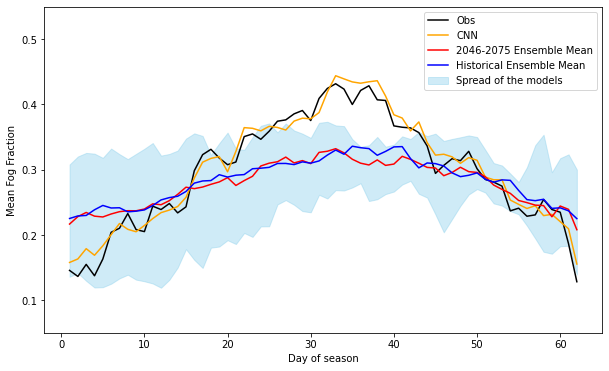

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

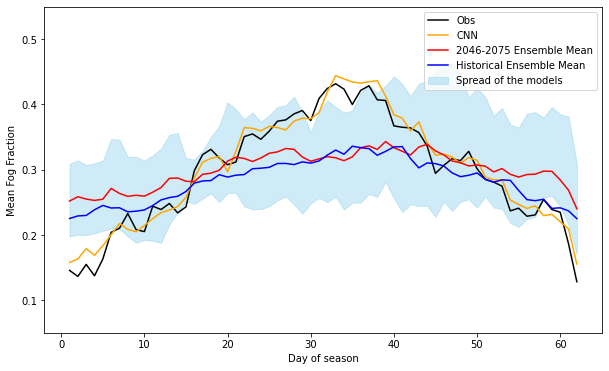

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

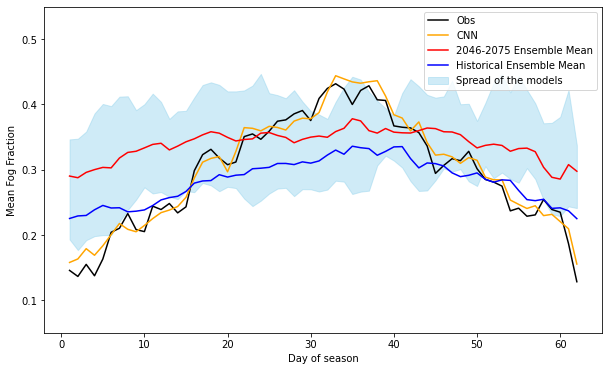

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

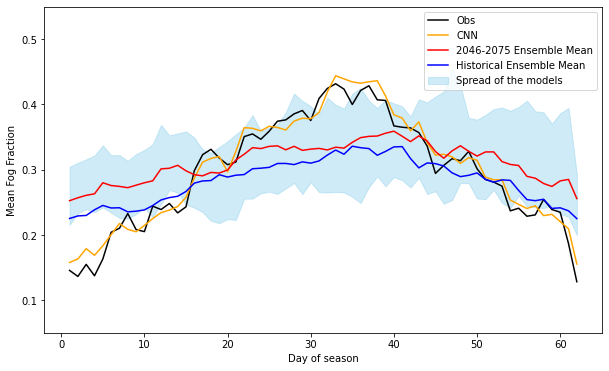

In [23]:
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs


scenarioString=['126','245','370','585']
classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']

x=np.arange(1,63)
for s in scenarioString:
    fig = plt.figure(figsize=(10,6))
    MTs=[]
    for  cL in classes:
        fL=load('../../April2021/New_ssp'+s+'/Modelplots_future/'+cL+'_ssp'+s+'.joblib')
        fL1=fL.sel(time=slice('2046-1-1','2075-12-31'))
        ts1=getSeasonalCycle(fL1)
        ts2=ts1.roll(dayofyear=31)
        ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
        MTs.append(ts)
        MS=np.array(MTs)
    meanMS=np.mean(MS, axis=0)
    minMS=np.amin(MS,axis=0)
    maxMS=np.amax(MS,axis=0)
    plt.fill_between(x, maxMS,minMS,
                 color="skyblue", alpha=0.4,label='Spread of the models')
    plt.plot(x,OTs,label='Obs', color='black')
    plt.plot(x,CNNTs,label='CNN', color='orange')
    plt.plot(x,meanMS,label='2046-2075 Ensemble Mean', color='red')
    plt.plot(x,histEns,label='Historical Ensemble Mean', color='blue')
    plt.ylim([0.05, 0.55])
    plt.xlabel('Day of season')
    plt.ylabel('Mean Fog Fraction')     
    plt.legend()    
    plt.savefig('ThreePeriods_FF_SC_'+s+'_2046-2075.eps')
    #print('\n'.join(map(str, meanMS)))
    plt.show()
    with open('FF_SC_'+s+'_2046-2075.txt', "w") as txt_file:
        json.dump(meanMS.tolist(), txt_file,indent=2)


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

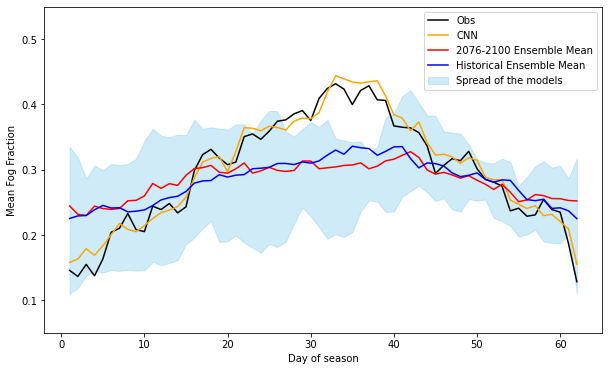

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

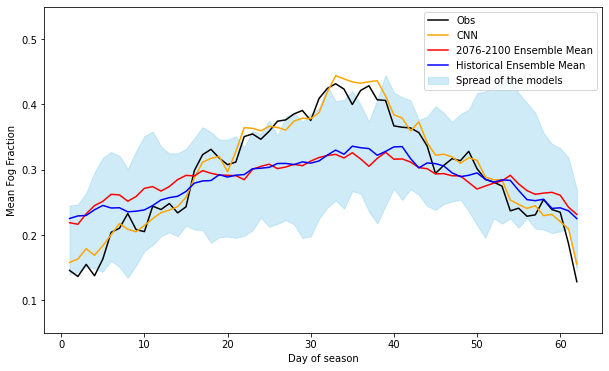

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

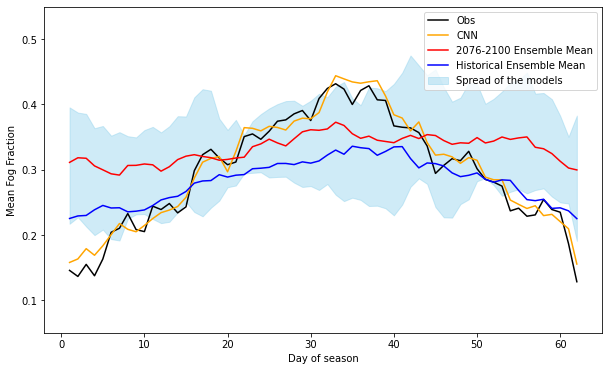

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

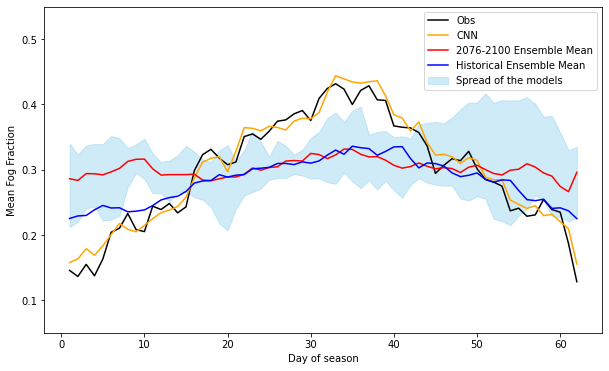

In [22]:
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs


scenarioString=['126','245','370','585']
classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']

x=np.arange(1,63)
for s in scenarioString:
    fig = plt.figure(figsize=(10,6))
    MTs=[]
    for  cL in classes:
        fL=load('../../April2021/New_ssp'+s+'/Modelplots_future/'+cL+'_ssp'+s+'.joblib')
        fL1=fL.sel(time=slice('2076-1-1','2100-12-31'))
        ts1=getSeasonalCycle(fL1)
        ts2=ts1.roll(dayofyear=31)
        ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
        MTs.append(ts)
        MS=np.array(MTs)
    meanMS=np.mean(MS, axis=0)
    minMS=np.amin(MS,axis=0)
    maxMS=np.amax(MS,axis=0)
    plt.fill_between(x, maxMS,minMS,
                 color="skyblue", alpha=0.4,label='Spread of the models')
    plt.plot(x,OTs,label='Obs', color='black')
    plt.plot(x,CNNTs,label='CNN', color='orange')
    plt.plot(x,meanMS,label='2076-2100 Ensemble Mean', color='red')
    plt.plot(x,histEns,label='Historical Ensemble Mean', color='blue')
    plt.ylim([0.05, 0.55])
    plt.xlabel('Day of season')
    plt.ylabel('Mean Fog Fraction')     
    plt.legend()    
    plt.savefig('ThreePeriods_FF_SC_'+s+'_2076-2100.eps')
    #print('\n'.join(map(str, meanMS)))
    plt.show()
    with open('FF_SC_'+s+'_2076-2100.txt', "w") as txt_file:
        json.dump(meanMS.tolist(), txt_file,indent=2)
